In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


- **category** : 범주형 데이터로 편의를 위해 pandas에서 지정
- ocum's razor : 같은 성능의 모델이면 더 단순한게 낫다
- 차원의 저주 : 차원이 많은데 비해 데이터가 적으면 왜곡된 결과가 나온다

In [4]:
tips.describe() # 숫자 데이터만 표현

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


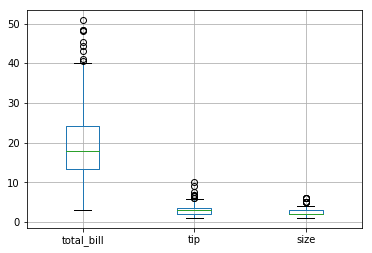

In [6]:
tips.boxplot()

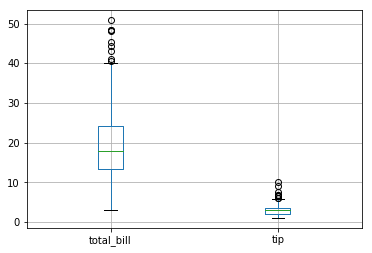

In [7]:
tips[['total_bill', 'tip']].boxplot() # size는 필요없다 ! categorical

### aggregation

In [8]:
tips.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [9]:
tips.groupby('sex').sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [10]:
tips.groupby('sex').max()

,total_bill,tip,size
sex,,,
Male,50.81,10.0,6
Female,44.30,6.5,6


In [11]:
tips.groupby('day').mean()

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [12]:
tips.groupby(['sex', 'day']).mean()

total_bill       tip      size
sex    day                                 
Male   Thur   18.714667  2.980333  2.433333
       Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
Female Thur   16.715312  2.575625  2.468750
       Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444

In [13]:
tips.groupby(['sex', 'day'])['total_bill', 'tip'].mean()

total_bill       tip
sex    day                       
Male   Thur   18.714667  2.980333
       Fri    19.857000  2.693000
       Sat    20.802542  3.083898
       Sun    21.887241  3.220345
Female Thur   16.715312  2.575625
       Fri    14.145556  2.781111
       Sat    19.680357  2.801786
       Sun    19.872222  3.367222

In [14]:
tips.groupby(['sex', 'day', 'time'])['total_bill', 'tip'].mean()

total_bill       tip
sex    day  time                        
Male   Thur Lunch    18.714667  2.980333
            Dinner         NaN       NaN
       Fri  Lunch    11.386667  1.900000
            Dinner   23.487143  3.032857
       Sat  Lunch          NaN       NaN
            Dinner   20.802542  3.083898
       Sun  Lunch          NaN       NaN
            Dinner   21.887241  3.220345
Female Thur Lunch    16.648710  2.561935
            Dinner   18.780000  3.000000
       Fri  Lunch    13.940000  2.745000
            Dinner   14.310000  2.810000
       Sat  Lunch          NaN       NaN
            Dinner   19.680357  2.801786
       Sun  Lunch          NaN       NaN
            Dinner   19.872222  3.367222

In [15]:
t = tips.groupby(['sex'])['total_bill', 'tip'].mean()

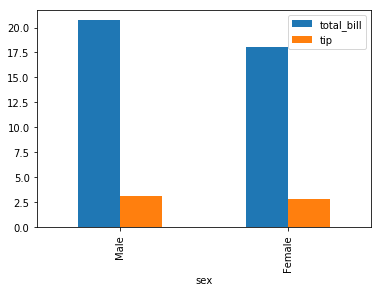

In [16]:
t.plot.bar() # dataFrame 또는 series에서는 .plot으로 그릴 수 있다.

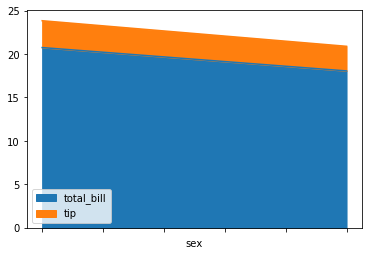

In [17]:
t.plot.area()

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('https://www.data.go.kr/dataset/fileDownload.do?atchFileId=FILE_000000001409581&fileDetailSn=1&publicDataDetailPk=uddi:8267a115-960a-42cd-bc2f-94f02052a2d7_201711281527',engine='python', encoding='cp949')
data.head()

,연번,경로당명칭,소재지,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
0,1,내서경로당,대구광역시 서구 달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10
1,2,시영내당(아)경로당,대구광역시 서구 서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10
2,3,홍실1차경로당,대구광역시 서구 서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10
3,4,황성정경로당,대구광역시 서구 통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10
4,5,홍실2차경로당,대구광역시 서구 통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
연번       81 non-null int64
경로당명칭    81 non-null object
소재지      81 non-null object
부지(㎡)    81 non-null float64
건물(㎡)    81 non-null float64
회원총계     81 non-null int64
남자회원     81 non-null int64
여자회원     81 non-null int64
전화번호     81 non-null object
기준일자     81 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 6.4+ KB


In [21]:
data.describe()

,연번,부지(㎡),건물(㎡),회원총계,남자회원,여자회원
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,169.695556,128.246543,36.234568,8.753086,27.518519
std,23.526581,157.520518,66.870121,12.110194,8.272743,11.860766
min,1.000000,18.540000,18.540000,17.000000,0.000000,0.000000
25%,21.000000,93.000000,79.000000,27.000000,2.000000,20.000000
50%,41.000000,154.110000,126.650000,35.000000,6.000000,26.000000
75%,61.000000,201.000000,164.200000,41.000000,13.000000,33.000000
max,81.000000,1293.300000,374.400000,70.000000,35.000000,67.000000


`연번` 필요없다
1. 연번을 index로 만들기 or
2. index를 삭제하기
### 연번을 index로

In [22]:
# 불러오면서 index 정하기
pd.read_csv('https://www.data.go.kr/dataset/fileDownload.do?atchFileId=FILE_000000001409581&fileDetailSn=1&publicDataDetailPk=uddi:8267a115-960a-42cd-bc2f-94f02052a2d7_201711281527',engine='python', encoding='cp949', index_col='연번').head()

,경로당명칭,소재지,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
연번,,,,,,,,,
1,내서경로당,대구광역시 서구 달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10
2,시영내당(아)경로당,대구광역시 서구 서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10
3,홍실1차경로당,대구광역시 서구 서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10
4,황성정경로당,대구광역시 서구 통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10
5,홍실2차경로당,대구광역시 서구 통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [23]:
data.set_index('연번').head() # 인덱스 2개이상(multiindex) 가능, 

,경로당명칭,소재지,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
연번,,,,,,,,,
1,내서경로당,대구광역시 서구 달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10
2,시영내당(아)경로당,대구광역시 서구 서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10
3,홍실1차경로당,대구광역시 서구 서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10
4,황성정경로당,대구광역시 서구 통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10
5,홍실2차경로당,대구광역시 서구 통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [24]:
data.head() # 안바뀌었다.

,연번,경로당명칭,소재지,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
0,1,내서경로당,대구광역시 서구 달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10
1,2,시영내당(아)경로당,대구광역시 서구 서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10
2,3,홍실1차경로당,대구광역시 서구 서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10
3,4,황성정경로당,대구광역시 서구 통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10
4,5,홍실2차경로당,대구광역시 서구 통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [25]:
olds_raw = data.copy() # deep copy로 원본 보관

In [26]:
data.set_index('연번', inplace=True) # But ! 원본 보관해야 한다. muttable & return None

In [27]:
data.head()

,경로당명칭,소재지,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
연번,,,,,,,,,
1,내서경로당,대구광역시 서구 달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10
2,시영내당(아)경로당,대구광역시 서구 서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10
3,홍실1차경로당,대구광역시 서구 서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10
4,황성정경로당,대구광역시 서구 통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10
5,홍실2차경로당,대구광역시 서구 통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [28]:
data.info() # range index가 int 인덱스로 바뀌었다. range가 효율적이다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 81
Data columns (total 9 columns):
경로당명칭    81 non-null object
소재지      81 non-null object
부지(㎡)    81 non-null float64
건물(㎡)    81 non-null float64
회원총계     81 non-null int64
남자회원     81 non-null int64
여자회원     81 non-null int64
전화번호     81 non-null object
기준일자     81 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 6.3+ KB


### index 삭제

In [29]:
data.reset_index().head() # index가 새로 생김..

,연번,경로당명칭,소재지,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
0,1,내서경로당,대구광역시 서구 달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10
1,2,시영내당(아)경로당,대구광역시 서구 서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10
2,3,홍실1차경로당,대구광역시 서구 서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10
3,4,황성정경로당,대구광역시 서구 통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10
4,5,홍실2차경로당,대구광역시 서구 통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [30]:
data.reset_index(drop=True).head() # 연번이 사라짐.

,경로당명칭,소재지,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
0,내서경로당,대구광역시 서구 달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10
1,시영내당(아)경로당,대구광역시 서구 서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10
2,홍실1차경로당,대구광역시 서구 서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10
3,황성정경로당,대구광역시 서구 통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10
4,홍실2차경로당,대구광역시 서구 통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [32]:
## 다시 data 불러옴
# data.drop(columns='연번', inplace=True)

In [33]:
data.head()

,경로당명칭,소재지,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
연번,,,,,,,,,
1,내서경로당,대구광역시 서구 달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10
2,시영내당(아)경로당,대구광역시 서구 서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10
3,홍실1차경로당,대구광역시 서구 서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10
4,황성정경로당,대구광역시 서구 통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10
5,홍실2차경로당,대구광역시 서구 통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [34]:
data.drop(labels=[1,2,3,4,5,6]).head() # label : 인덱스에 해당하는 record 지움

,경로당명칭,소재지,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
연번,,,,,,,,,
7,내당2동경로당,대구광역시 서구 큰장로15길 14-20,93.00,62.64,35,10,25,053-571-1637,2017-11-10
8,내당경로당,대구광역시 서구 평리로 408-13,216.00,183.68,40,5,35,053-565-0437,2017-11-10
9,천일경로당,대구광역시 서구 달구벌대로373길 2-24,165.00,172.84,17,2,15,053-566-3077,2017-11-10
10,삼화경로당,대구광역시 서구 달구벌대로373길 7-5,130.00,136.02,30,5,25,053-565-5084,2017-11-10
11,삼익맨션경로당,대구광역시 서구 서대구로 25,109.09,109.09,25,0,25,053-567-7765,2017-11-10


In [35]:
data.drop(labels='소재지', axis=1).head() # index로 row를 지우는 것 뿐만 아니라 name으로 column 지울수도 있다.

,경로당명칭,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
연번,,,,,,,,
1,내서경로당,139.80,160.80,40,0,40,053-554-0739,2017-11-10
2,시영내당(아)경로당,119.00,119.00,24,6,18,053-567-9772,2017-11-10
3,홍실1차경로당,90.00,90.00,41,9,32,053-551-8286,2017-11-10
4,황성정경로당,134.74,134.74,40,10,30,053-553-9874,2017-11-10
5,홍실2차경로당,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [36]:
data = olds_raw.copy() ## copy해놓는 이유

In [37]:
data.drop('연번' , axis=1, inplace=True)

### 소재지로 나눠보자


In [38]:
data.rename(columns={'소재지':'주소'}, inplace=True) # dictionary 형태로 바꾼다

In [39]:
data.head()

,경로당명칭,주소,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자
0,내서경로당,대구광역시 서구 달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10
1,시영내당(아)경로당,대구광역시 서구 서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10
2,홍실1차경로당,대구광역시 서구 서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10
3,황성정경로당,대구광역시 서구 통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10
4,홍실2차경로당,대구광역시 서구 통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10


In [40]:
data['시'] = '대구광역시'

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
경로당명칭    81 non-null object
주소       81 non-null object
부지(㎡)    81 non-null float64
건물(㎡)    81 non-null float64
회원총계     81 non-null int64
남자회원     81 non-null int64
여자회원     81 non-null int64
전화번호     81 non-null object
기준일자     81 non-null object
시        81 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 6.4+ KB


## 기준일자
[파이썬 날짜 타입](./datetime.ipynb)

In [42]:
data['기준일자'].dtype

dtype('O')

In [43]:
data['기준일자'] = data['기준일자'].astype('datetime64') # inplace 없다. 재할당해야함
data['기준일자'].head()

0   2017-11-10
1   2017-11-10
2   2017-11-10
3   2017-11-10
4   2017-11-10
Name: 기준일자, dtype: datetime64[ns]

In [44]:
data['기준일자'].describe()

count                      81
unique                      1
top       2017-11-10 00:00:00
freq                       81
first     2017-11-10 00:00:00
last      2017-11-10 00:00:00
Name: 기준일자, dtype: object

In [45]:
pd.to_datetime(data['기준일자']).head()

0   2017-11-10
1   2017-11-10
2   2017-11-10
3   2017-11-10
4   2017-11-10
Name: 기준일자, dtype: datetime64[ns]

In [46]:
tmp = data['주소'].str # 대구광역시 없애고시퍼

In [47]:
data['주소'] = tmp.replace('대구광역시', '')

In [48]:
data['구'] = '서구'
data['주소'] = tmp.replace('서구', '')

In [49]:
data.head()

,경로당명칭,주소,부지(㎡),건물(㎡),회원총계,남자회원,여자회원,전화번호,기준일자,시,구
0,내서경로당,달구벌대로361길 35-29,139.80,160.80,40,0,40,053-554-0739,2017-11-10,대구광역시,서구
1,시영내당(아)경로당,서대구로8길 15 내당시영아파트,119.00,119.00,24,6,18,053-567-9772,2017-11-10,대구광역시,서구
2,홍실1차경로당,서대구로8길 49 내당보성홍실아파트,90.00,90.00,41,9,32,053-551-8286,2017-11-10,대구광역시,서구
3,황성정경로당,통학로 46,134.74,134.74,40,10,30,053-553-9874,2017-11-10,대구광역시,서구
4,홍실2차경로당,통학로 39 보성2차홍실타운,154.11,154.11,31,0,31,053-556-8220,2017-11-10,대구광역시,서구


# Tip Data

In [50]:
import seaborn as sns

In [51]:
tips = sns.load_dataset('tips')

In [52]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [53]:
tips['size'] = tips['size'].astype('category')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null category
dtypes: category(5), float64(2)
memory usage: 5.8 KB


In [55]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

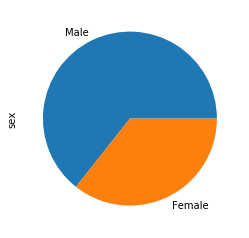

In [56]:
tips.sex.value_counts().plot.pie() # index는 x축

In [57]:
tips.sex.unique()

[Female, Male]
Categories (2, object): [Female, Male]

In [58]:
tips.sex.nunique() # 카테고리수

2

In [59]:
t = tips.sex.cat # 카테고리 ~= .str

In [60]:
t.codes.head() ## 카테고리별 숫자로 관리한다. label encoding

0    1
1    0
2    0
3    0
4    1
dtype: int8

In [61]:
tips.groupby('size').mean()

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


------------------

In [62]:
mpg = sns.load_dataset('mpg')

In [63]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [64]:
mpg.tail(10).describe() # 데이터가 편향되었나?

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,30.500000,4.200000,142.900000,85.700000,2596.500000,16.320000,82.0
std,6.150881,0.632456,35.766061,15.114746,258.199428,3.797894,0.0
min,22.000000,4.000000,97.000000,52.000000,2130.000000,11.600000,82.0
25%,27.000000,4.000000,123.750000,82.500000,2423.750000,14.050000,82.0
50%,29.500000,4.000000,137.500000,85.000000,2645.000000,15.150000,82.0
75%,32.000000,4.000000,149.250000,91.500000,2772.500000,18.275000,82.0
max,44.000000,6.000000,232.000000,112.000000,2950.000000,24.600000,82.0


In [65]:
# !pip install missingno

In [66]:
import missingno as mino

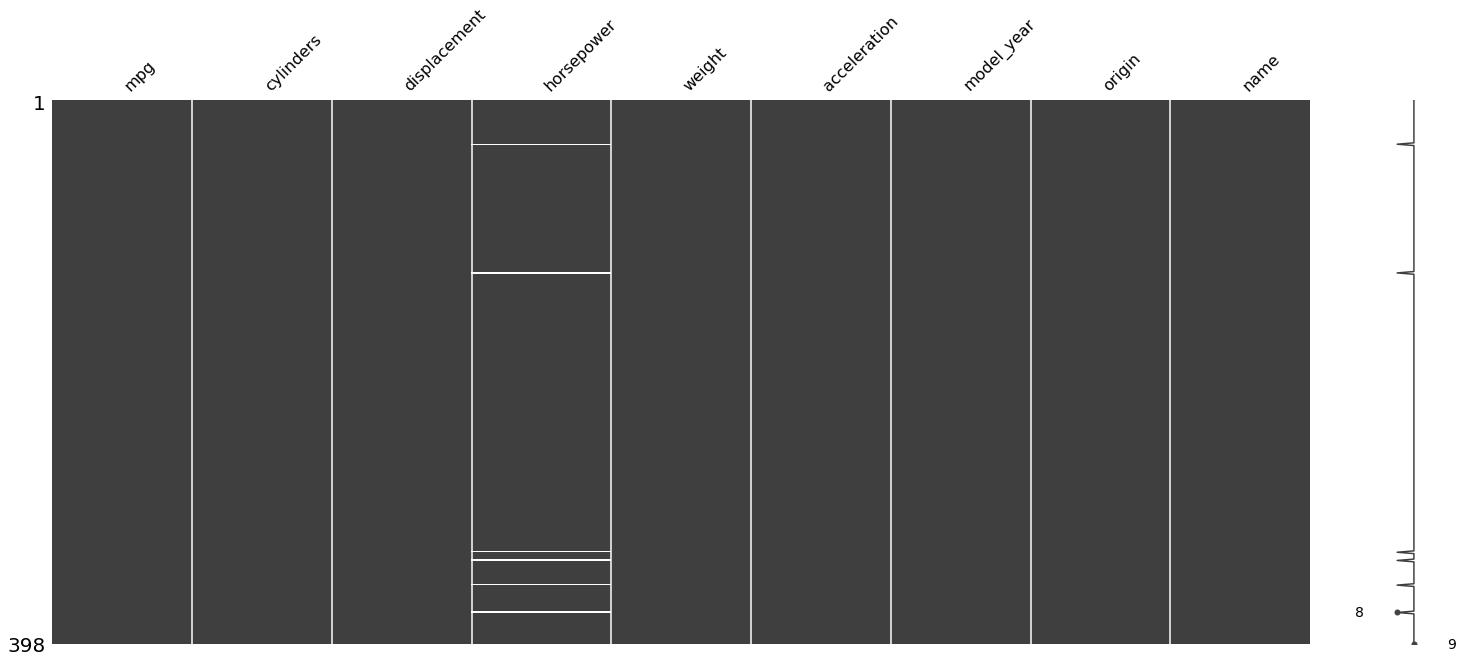

In [67]:
mino.matrix(mpg)

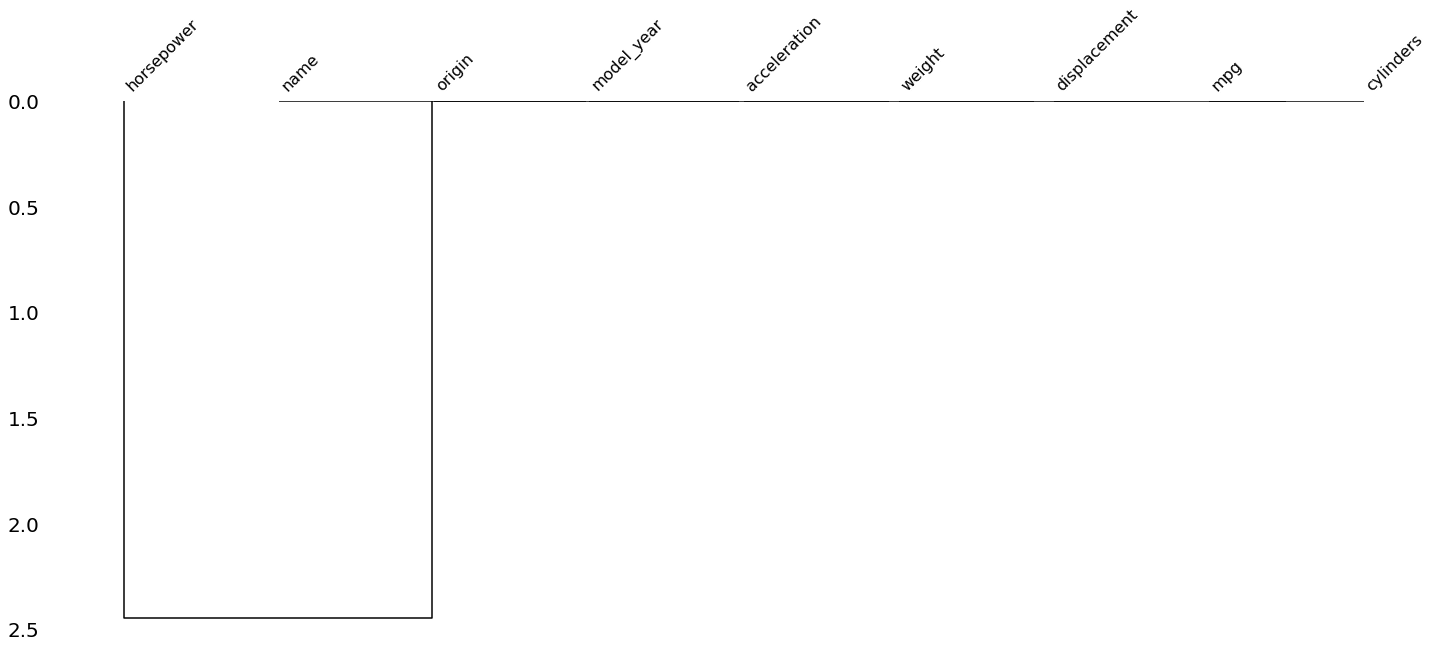

In [68]:
mino.dendrogram(mpg)

In [69]:
mpg[mpg['horsepower'].isna()] # masking 쓸 수 있다. nan값만 찾아낼 수 있다!!!!

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [70]:
mpg['horsepower'].isna().sum()

6

In [71]:
pd.isna == pd.isnull # 똑같다!!!!

True

In [72]:
mpg.dropna().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [73]:
mpg.fillna()

ValueError: Must specify a fill 'value' or 'method'.

In [76]:
#  from scipy import interpolate : interpolate 합수들이 들어있다.

In [77]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


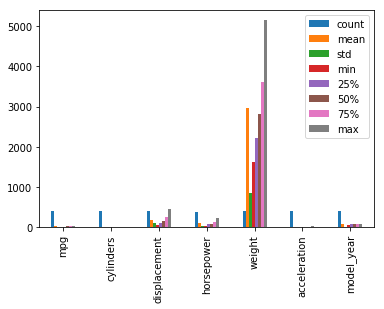

In [78]:
mpg.describe().T.plot.bar()

In [79]:
mpg[mpg.columns[:-2]].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [80]:
mpg.filter(regex=r'[^weight]').head()

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,10.5,70,usa,ford torino


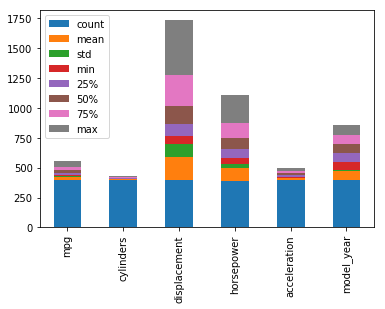

In [88]:
mpg.filter(regex=r'[^weight]').describe().T.plot.bar(stacked=True);

In [89]:
# sns.pairplot(mpg) # regression이라 hue가 힘들다

In [90]:
mpg.corr() # 상관계수

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [92]:
mpg.cov() # 공분산

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,61.089611,-10.308911,-655.402318,-233.857926,-5505.211745,9.058930,16.741163
cylinders,-10.308911,2.893415,168.623214,55.348244,1290.695575,-2.370842,-2.193499
displacement,-655.402318,168.623214,10872.199152,3614.033744,82368.423240,-156.332976,-142.717137
horsepower,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432
weight,-5505.211745,1290.695575,82368.423240,28265.620231,717140.990526,-974.899011,-959.946344
acceleration,9.058930,-2.370842,-156.332976,-73.186967,-974.899011,7.604848,2.938105
model_year,16.741163,-2.193499,-142.717137,-59.036432,-959.946344,2.938105,13.672443


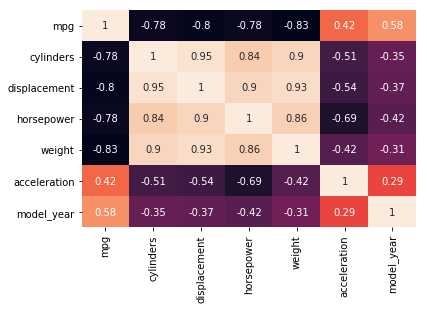

In [99]:
sns.heatmap(mpg.corr(), annot=True, cbar=False);

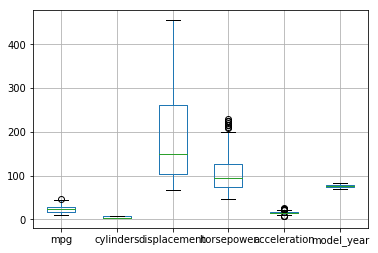

In [102]:
mpg.filter(regex=r'[^weight]').boxplot();

[PyOD 딥러닝 기법을 이용한 아웃라이어 인식](https://pyod.readthedocs.io/en/latest/) 